An example using pandas data reader to load stock price data and use the ewm function from pandas. This example is from this blog https://www.learnpythonwithrune.org/simple-and-exponential-moving-average-with-python-and-pandas/

In [1]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn')
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['font.family'] = 'serif'

Using pandas_datareader, we load in the stock price of Apple from Yahoo!Finance.

In [2]:
ticker = "AAPL"
start = dt.datetime(2019, 1, 1)
end = dt.datetime(2020, 12, 31)

data = pdr.get_data_yahoo(ticker, start, end)

print(data.head())

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2019-01-02  39.712502  38.557499  38.722500  39.480000  148158800.0  38.439735
2019-01-03  36.430000  35.500000  35.994999  35.547501  365248800.0  34.610851
2019-01-04  37.137501  35.950001  36.132500  37.064999  234428400.0  36.088364
2019-01-07  37.207500  36.474998  37.174999  36.982498  219111200.0  36.008041
2019-01-08  37.955002  37.130001  37.389999  37.687500  164101200.0  36.694466


Calculate the exponentially weighted moving average (EWMA). Alpha is the weighting factor.

In [3]:
data['EMA10'] = data['Close'].ewm(alpha=0.25).mean()

Plot the EWMA data over the raw data.

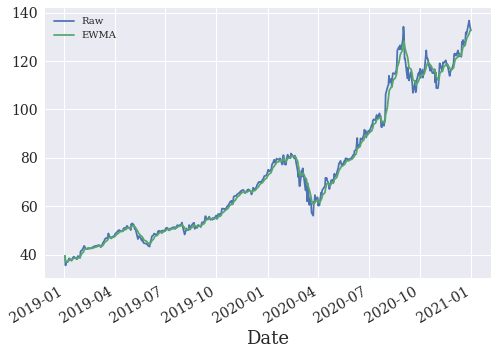

In [4]:
data.Close.plot(label="Raw")
data.EMA10.plot(label="EWMA")
plt.legend()